## soal 1

Pt.Cofi sedang melakukan sebuah project, senior Data Scientist telah melakukan clustering menggunakan model K-means. setelah di clusering kalian diminta tolong oleh Senior kalian untuk melanjutkan project ini. Anda sebagai Data Junior Scientist diminta untuk melakukan eksplore terhadap data yang ada untuk menentukan arti dari tiap tiap cluster yang ada.
berikut adalah keterangan dari tiap column

https://search.r-project.org/CRAN/refmans/HSAUR3/html/USairpollution.html

note:
1. Kalian dibebaskan untuk melakukan visualisasi apapun, serta menjabarkan apa saja yang anda temukan.
2. Tujuan akhir dari soal ini adalah pengelompokan dari tiap cluster yang ada.
3. Disarankan juga mencari informasi dari luar (browsing google).

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
ap = pd.read_csv('USairpollution_quiz2.csv')

In [121]:
ap.head(5)

,City,SO2,temp,manu,popul,wind,precip,predays,clusters
0,Albany,46,47.6,44,116,8.8,33.36,135,1
1,Albuquerque,11,56.8,46,244,8.9,7.77,58,0
2,Atlanta,24,61.5,368,497,9.1,48.34,115,3
3,Baltimore,47,55.0,625,905,9.6,41.31,111,1
4,Buffalo,11,47.1,391,463,12.4,36.11,166,4


In [122]:
ap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      41 non-null     object 
 1   SO2       41 non-null     int64  
 2   temp      41 non-null     float64
 3   manu      41 non-null     int64  
 4   popul     41 non-null     int64  
 5   wind      41 non-null     float64
 6   precip    41 non-null     float64
 7   predays   41 non-null     int64  
 8   clusters  41 non-null     int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 3.0+ KB


In [123]:
ap.isnull().sum()

City        0
SO2         0
temp        0
manu        0
popul       0
wind        0
precip      0
predays     0
clusters    0
dtype: int64

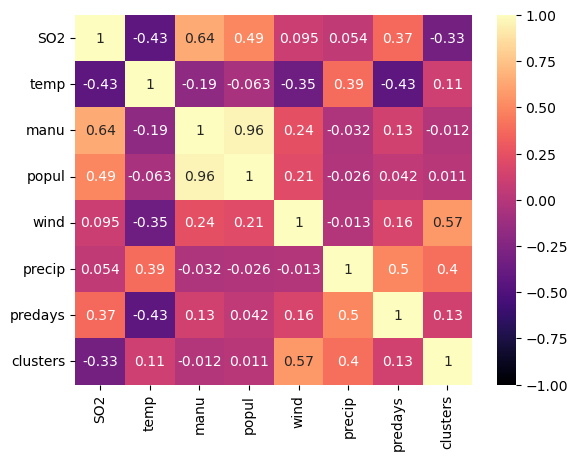

In [124]:
heatmap = sns.heatmap(ap.corr(), vmin=-1, vmax=1, annot=True, cmap='magma')

### insight
- popul dan manu memiliki korelasi positif yg sangat besar
- manu dan SO2 memiliki korelasi positif
- popul dan SO2 memiliki korelasi positif
- cluster dan SO2 memiliki korelasi negatif 
- temp dan SO2 memiliki korelasi negatif

<AxesSubplot:xlabel='clusters', ylabel='popul'>

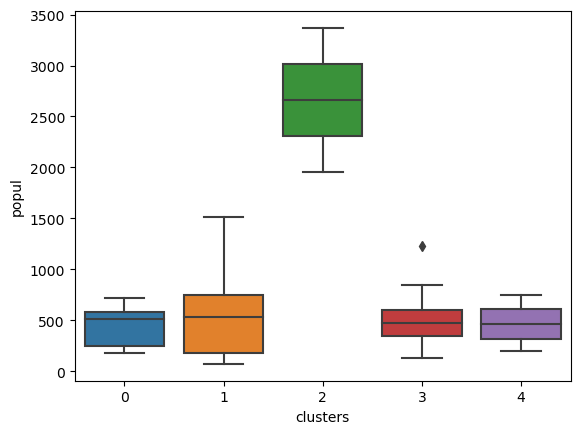

In [147]:
# sns.boxplot(column='popul',by='clusters')
sns.boxplot(data=ap, x="clusters", y="popul")

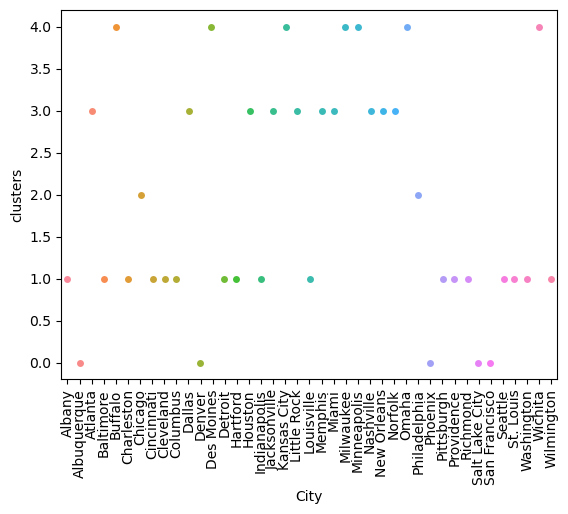

In [160]:
sns.stripplot(data=ap, x="City", y="clusters")
plt.xticks(rotation = 90)
plt.show()

In [136]:
apmean1 = ap.groupby('clusters')['popul','manu','SO2'].sum().reset_index()
apmean1

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6468\428393345.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  apmean1 = ap.groupby('clusters')['popul','manu','SO2'].sum().reset_index()


,clusters,popul,manu,SO2
0,0,2233,1303,78
1,1,8834,7122,718
2,2,5319,5036,179
3,3,5311,3076,148
4,4,3256,2450,109


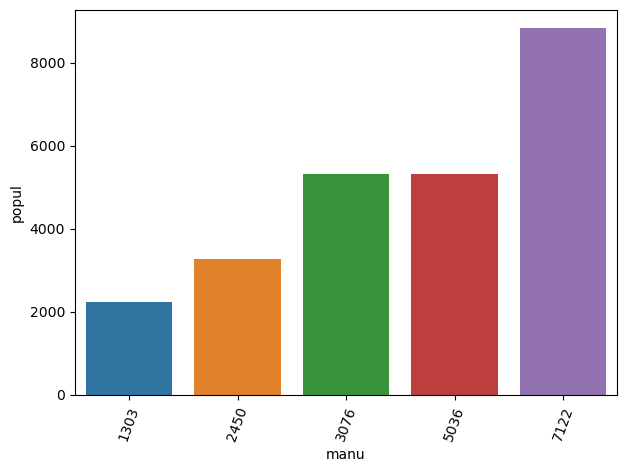

In [137]:
plt.figure(figsize=(7,5))
sns.barplot(data=apmean1,x='manu',y='popul')
plt.xticks(rotation = 70)
plt.show()

### Insight
- Semakin tinggi tingkatan cluster, maka semakin banyak populasinya
- Semakin banyak populasi, maka semakin banyak manufacturing(pabrik)

In [134]:
apmean = ap.groupby('clusters')['SO2','wind','precip','manu','popul'].sum().reset_index()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6468\2702585387.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  apmean = ap.groupby('clusters')['SO2','wind','precip','manu','popul'].sum().reset_index()


,clusters,SO2,wind,precip,manu,popul
0,0,78,41.3,63.60,1303,2233
1,1,718,153.4,658.02,7122,8834
2,2,179,20.0,74.37,5036,5319
3,3,148,92.9,491.81,3076,5311
4,4,109,79.6,219.73,2450,3256


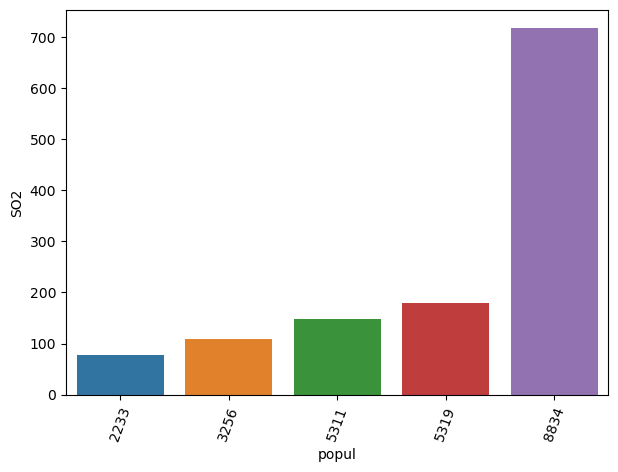

In [135]:
plt.figure(figsize=(7,5))
sns.barplot(data=apmean,x='popul',y='SO2')
plt.xticks(rotation = 70)
plt.show()

### Insight
- semakin banyak populasi maka semakin tinggi SO2

#### Cluster tertinggi dimana itu cluster 4 memiliki jumlah populasi dan manufacturing(pabrik) terbanyak dibanding cluster lainnya
#### Cluster 4 yang memiliki populasi paling tinggi juga memiliki SO2 yang tinggi dibanding cluster lainnya
#### Dari hasil diatas, Asumsi saya cluster dibedakan berdasarkan populasinya